### 1. Importing all the essential libraries

In [1]:
import string 
import re
import codecs
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import feature_extraction
from sklearn import linear_model
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics
import itertools

### 2. Loading the data

In [2]:
# Loading english raw data

english_df = pd.read_csv("europarl-v7.bg-en.en", "ut-8", header=None, names=["English"])

/home/akhil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [3]:
english_df.head()

,English
0,Membership of Parliament: see Minutes
1,Approval of Minutes of previous sitting: see M...
2,Membership of Parliament: see Minutes
3,Verification of credentials: see Minutes
4,Documents received: see Minutes


In [4]:
# Loading raw german data
german_df = pd.read_csv("europarl-v7.de-en.de", "utf-8", header=None, names=["German"])
german_df.head()

/home/akhil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


,German
0,Wiederaufnahme der Sitzungsperiode
1,"Ich erkläre die am Freitag, dem 17. Dezember u..."
2,"Wie Sie feststellen konnten, ist der gefürchte..."
3,Im Parlament besteht der Wunsch nach einer Aus...
4,Heute möchte ich Sie bitten - das ist auch der...


In [5]:
# Loading raw french data

french_df = pd.read_csv("europarl-v7.fr-en.fr", "utf-8", header=None, names=["French"])
french_df.head()

/home/akhil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


,French
0,Reprise de la session
1,Je déclare reprise la session du Parlement eur...
2,"Comme vous avez pu le constater, le grand ""bog..."
3,Vous avez souhaité un débat à ce sujet dans le...
4,"En attendant, je souhaiterais, comme un certai..."


In [6]:
# Loading raw spanish data

spanish_df = pd.read_csv("europarl-v7.es-en.es", "utf-8", header=None, names=["Spanish"])
spanish_df.head()

/home/akhil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


,Spanish
0,Reanudación del período de sesiones
1,Declaro reanudado el período de sesiones del P...
2,"Como todos han podido comprobar, el gran ""efec..."
3,Sus Señorías han solicitado un debate sobre el...
4,"A la espera de que se produzca, de acuerdo con..."


In [7]:
#Loading raw bulgarian data

bulgarian_df = pd.read_csv("europarl-v7.bg-en.bg", "utf-8", header=None, names=['Bulgarian'])
bulgarian_df.head()

/home/akhil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


,Bulgarian
0,Състав на Парламента: вж. протоколи
1,Одобряване на протокола от предишното заседани...
2,Състав на Парламента: вж. протоколи
3,Проверка на пълномощията: вж. протоколи
4,Внасяне на документи: вж. протоколи


In [8]:
# Loading raw Czech data

czech_df = pd.read_csv("europarl-v7.cs-en.cs", "utf-8", header=None, names=['Czech'])
czech_df.head()

/home/akhil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


,Czech
0,Následný postup na základě usnesení Parlamentu...
1,Předložení dokumentů: viz zápis
2,Písemná prohlášení (článek 116 jednacího řádu)...
3,Texty smluv dodané Radou: viz zápis
4,Složení Parlamentu: viz zápis


In [9]:
# Loading raw Danish data

danish_df = pd.read_csv('europarl-v7.da-en.da', "utf-8", header=None, names=['Danish'])
danish_df.head()

/home/akhil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


,Danish
0,Genoptagelse af sessionen
1,"Jeg erklærer Europa-Parlamentets session, der ..."
2,"Som De kan se, indfandt det store ""år 2000-pro..."
3,De har udtrykt ønske om en debat om dette emne...
4,I mellemtiden ønsker jeg - som også en del kol...


In [10]:
# Loading raw Finnish data

finnish_df = pd.read_csv('europarl-v7.fi-en.fi', "utf-8", header=None, names=['Finnish'])
finnish_df.head()

/home/akhil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


,Finnish
0,Istuntokauden uudelleenavaaminen
1,Julistan perjantaina joulukuun 17. päivänä kes...
2,"Kuten olette varmaan saattaneet huomata, vuode..."
3,"Te olette esittäneet toiveen, että tästä asias..."
4,"Sillä välin toivoisin, kuten useampi kollega o..."


In [11]:
# Loading raw Hungarian data

hungarian_df = pd.read_csv('europarl-v7.hu-en.hu', 'utf-8', header=None, names=['Hungarian'])
hungarian_df.head()

/home/akhil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


,Hungarian
0,A Parlament állásfoglalásaival kapcsolatos tov...
1,Dokumentumok benyújtása: lásd a jegyzőkönyvet
2,Írásbeli nyilatkozatok (az Eljárási Szabályzat...
3,A megállapodások szövegeinek Tanács általi elő...
4,A Parlament tagjai: lásd a jegyzőkönyvet


In [12]:
# Loading raw Latvian data

latvian_df = pd.read_csv('europarl-v7.lv-en.lv', 'utf-8', header=None, names=['Latvian'])
latvian_df.head()

/home/akhil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


,Latvian
0,Saistībā ar Parlamenta rezolūcijām veiktie pas...
1,Dokumentu iesniegšana (sk. protokolu)
2,Rakstiskas deklarācijas (Reglamenta 116. pants...
3,Padomes nosūtītie nolīgumu teksti (sk. protokolu)
4,Parlamenta sastāvs (sk. protokolu)


In [13]:
# Loading raw Dutch data

dutch_df = pd.read_csv('europarl-v7.nl-en.nl', 'utf-8', header=None, names=['Dutch'])
dutch_df.head()

/home/akhil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


,Dutch
0,Hervatting van de zitting
1,Ik verklaar de zitting van het Europees Parlem...
2,"Zoals u heeft kunnen constateren, is de grote ..."
3,U heeft aangegeven dat u deze vergaderperiode ...
4,Nu wil ik graag op verzoek van een aantal coll...


In [14]:
# Loading raw Polish data

polish_df = pd.read_csv('europarl-v7.pl-en.pl', 'utf-8', header=None, names=['Polish'])
polish_df.head()

/home/akhil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


,Polish
0,Działania podjęte w wyniku rezolucji Parlament...
1,Składanie dokumentów: patrz protokół
2,Oświadczenia pisemne (art. 116 Regulaminu): pa...
3,Teksty porozumień przekazane przez Radę: patrz...
4,Skład Parlamentu: patrz protokół


In [15]:
# Loading raw Portuguese data

portuguese_data = pd.read_csv('europarl-v7.pt-en.pt', 'utf-8', header=None, names=['Portuguese'])
portuguese_data.head()

/home/akhil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


,Portuguese
0,Reinício da sessão
1,Declaro reaberta a sessão do Parlamento Europe...
2,"Como puderam constatar, o grande ""bug do ano 2..."
3,Os senhores manifestaram o desejo de se proced...
4,"Entretanto, gostaria - como também me foi pedi..."


In [16]:
# Loading raw Romanian data

romanian_df = pd.read_csv('europarl-v7.ro-en.ro', 'utf-8', header=None, names=['Romanian'])
romanian_df.head()

/home/akhil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


,Romanian
0,Componenţa Parlamentului: a se vedea procesul-...
1,Aprobarea procesului-verbal al şedinţei preced...
2,Componenţa Parlamentului: a se vedea procesul-...
3,Verificarea prerogativelor: a se vedea procesu...
4,Depunere de documente: a se vedea procesul-verbal


In [17]:
# Loading raw Slovak data

# slovak_df = pd.read_csv('europarl-v7.sk-en.sk', 'utf-8', header=None, names=['Slovak'])
# slovak_df.head()

In [18]:
# Loading raw Slovenian data

slovenian_df = pd.read_csv('europarl-v7.sl-en.sl', 'utf-8', header=None, names=['Slovenian'])
slovenian_df.head()

/home/akhil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


,Slovenian
0,Nadaljnje obravnavanje resolucij Parlamenta: g...
1,Predložitev dokumentov: glej zapisnik
2,Pisne izjave (člen 116): glej zapisnik
3,Posredovanje besedil sporazumov s strani Sveta...
4,Sestava Parlamenta: glej zapisnik


In [19]:
# Loading raw Swedish data

swedish_df = pd.read_csv('europarl-v7.sv-en.sv', 'utf-8', header=None, names=['Swedish'])
swedish_df.head()

/home/akhil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


,Swedish
0,Återupptagande av sessionen
1,Jag förklarar Europaparlamentets session återu...
2,"Som ni kunnat konstatera ägde ""den stora år 20..."
3,Ni har begärt en debatt i ämnet under sammantr...
4,"Till dess vill jag att vi, som ett antal kolle..."


### 3. Data Preprocessing

In [20]:
for char in string.punctuation:
    print(char, end = ' ')
translate_table = dict((ord(char), None) for char in string.punctuation)

! " # $ % & ' ( ) * + , - . / : ; < = > ? @ [ \ ] ^ _ ` { | } ~ 

In [21]:
# Cleaning the data for english dataset

data_eng = []
lang_eng = []

for i, line in english_df.iterrows():
    line = line['English']
    if len(line) !=0:
        line = line.lower()
        line = re.sub(r"\d+", "", line)
        line = line.translate(translate_table)
        data_eng.append(line)
        lang_eng.append("English")

In [22]:
# Cleaning the data for german dataset

data_ger = []
lang_ger = []

for i, line in german_df.iterrows():
    line = line['German']
    if len(line) !=0:
        line = line.lower()
        line = re.sub(r"\d+", "", line)
        line = line.translate(translate_table)
        data_ger.append(line)
        lang_ger.append("German")

In [23]:
# Cleaning the data for french dataset

data_fre = []
lang_fre = []

for i, line in french_df.iterrows():
    line = line['French']
    if len(line) !=0:
        line = line.lower()
        line = re.sub(r"\d+", "", line)
        line = line.translate(translate_table)
        data_fre.append(line)
        lang_fre.append("French")

In [24]:
# Cleaning the data for spanish dataset

data_esp = []
lang_esp = []

for i, line in spanish_df.iterrows():
    line = line['Spanish']
    if len(line) !=0:
        line = line.lower()
        line = re.sub(r"\d+", "", line)
        line = line.translate(translate_table)
        data_esp.append(line)
        lang_esp.append("Spanish")

In [25]:
# Cleaning the data for Bulgarian dataset

data_bul = []
lang_bul = []

for i, line in bulgarian_df.iterrows():
    line = line['Bulgarian']
    if len(line) !=0:
        line = line.lower()
        line = re.sub(r"\d+", "", line)
        line = line.translate(translate_table)
        data_esp.append(line)
        lang_esp.append("Bulgarian")

In [26]:
# Cleaning the data for Czech dataset

data_czech = []
lang_czech = []

for i, line in czech_df.iterrows():
    line = line['Czech']
    if len(line) !=0:
        line = line.lower()
        line = re.sub(r"\d+", "", line)
        line = line.translate(translate_table)
        data_esp.append(line)
        lang_esp.append("Czech")

In [27]:
# Cleaning the data for Danish dataset

data_dan = []
lang_dan = []

for i, line in danish_df.iterrows():
    line = line['Danish']
    if len(line) !=0:
        line = line.lower()
        line = re.sub(r"\d+", "", line)
        line = line.translate(translate_table)
        data_esp.append(line)
        lang_esp.append("Danish")

In [28]:
# Cleaning the data for finnish dataset

data_fin = []
lang_fin = []

for i, line in finnish_df.iterrows():
    line = line['Finnish']
    if len(line) !=0:
        line = line.lower()
        line = re.sub(r"\d+", "", line)
        line = line.translate(translate_table)
        data_esp.append(line)
        lang_esp.append("Finnish")

In [29]:
# Cleaning the data for Hugarian dataset

data_hung = []
lang_hung = []

for i, line in hungarian_df.iterrows():
    line = line['Hungarian']
    if len(line) !=0:
        line = line.lower()
        line = re.sub(r"\d+", "", line)
        line = line.translate(translate_table)
        data_esp.append(line)
        lang_esp.append("Hungarian")

In [30]:
# Cleaning the data for Latvian dataset

data_lat = []
lang_lat = []

for i, line in latvian_df.iterrows():
    line = line['Latvian']
    if len(line) !=0:
        line = line.lower()
        line = re.sub(r"\d+", "", line)
        line = line.translate(translate_table)
        data_esp.append(line)
        lang_esp.append("Latvian")

In [31]:
# Cleaning the data for Dutch dataset

data_dutch = []
lang_dutch = []

for i, line in dutch_df.iterrows():
    line = line['Dutch']
    if len(line) !=0:
        line = line.lower()
        line = re.sub(r"\d+", "", line)
        line = line.translate(translate_table)
        data_esp.append(line)
        lang_esp.append("Dutch")

In [32]:
# Cleaning the data for Polish dataset

data_pol = []
lang_pol = []

for i, line in polish_df.iterrows():
    line = line['Polish']
    if len(line) !=0:
        line = line.lower()
        line = re.sub(r"\d+", "", line)
        line = line.translate(translate_table)
        data_esp.append(line)
        lang_esp.append("Polish")

In [33]:
# Cleaning the data for Portuguese dataset

data_port = []
lang_port = []

for i, line in portuguese_data.iterrows():
    line = line['Portuguese']
    if len(line) !=0:
        line = line.lower()
        line = re.sub(r"\d+", "", line)
        line = line.translate(translate_table)
        data_esp.append(line)
        lang_esp.append("Portuguese")

In [34]:
# Cleaning the data for Romanian dataset

data_rom = []
lang_rom = []

for i, line in romanian_df.iterrows():
    line = line['Romanian']
    if len(line) !=0:
        line = line.lower()
        line = re.sub(r"\d+", "", line)
        line = line.translate(translate_table)
        data_esp.append(line)
        lang_esp.append("Romanian")

In [35]:
# Cleaning the data for Romanian dataset

data_slo = []
lang_slo = []

for i, line in slovenian_df.iterrows():
    line = line['Slovenian']
    if len(line) !=0:
        line = line.lower()
        line = re.sub(r"\d+", "", line)
        line = line.translate(translate_table)
        data_esp.append(line)
        lang_esp.append("Slovenian")

### 4. Transforming the data into a single dataset

In [36]:
df = pd.DataFrame({
    "Text" : data_eng+data_ger+data_fre+data_esp+data_bul+data_czech+data_dan+data_fin+data_hung+data_lat+data_dutch+data_port+data_pol+data_rom+data_slo,
    "Language" : lang_eng+lang_ger+lang_fre+lang_esp+lang_bul+lang_czech+lang_dan+lang_fin+lang_hung+lang_lat+lang_dutch+lang_port+lang_pol+lang_rom+lang_slo
})

print(df.shape)

(90042, 2)


In [37]:
df.head()

,Text,Language
0,membership of parliament see minutes,English
1,approval of minutes of previous sitting see mi...,English
2,membership of parliament see minutes,English
3,verification of credentials see minutes,English
4,documents received see minutes,English


In [38]:
df.tail()

,Text,Language
90037,sv komisiji se zahvaljujem za njeno strategijo,Slovenian
90038,spodbudila je pomembno in potrebno razpravo o ...,Slovenian
90039,alkohol ni navaden proizvod,Slovenian
90040,ima negativen vpliv na zdravje kar mora notran...,Slovenian
90041,to ne pomeni da se mora alkohol prepovedati,Slovenian


In [39]:
df['Language'].value_counts()

Bulgarian     6010
Czech         6010
Latvian       6007
Slovenian     6007
Polish        6007
English       6007
Hungarian     6007
Romanian      6006
Dutch         6001
Danish        6000
Finnish       5998
French        5997
Portuguese    5996
German        5995
Spanish       5994
Name: Language, dtype: int64

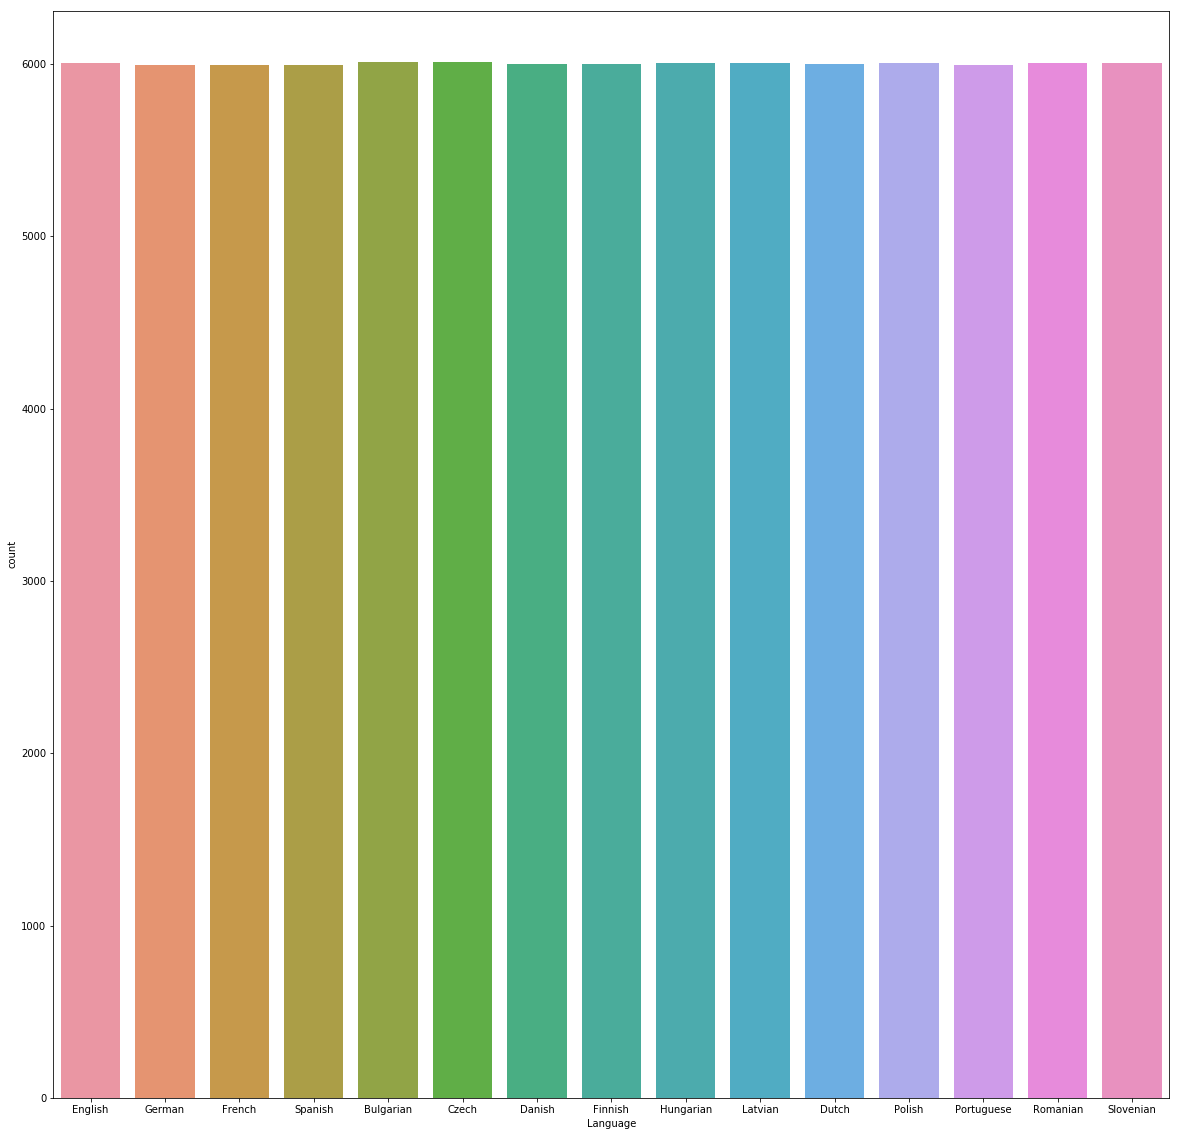

In [57]:
plt.figure(figsize=(20,20))
sns.countplot(x = df['Language'], data=df)

### 5. Splitting the dataset

* Splitting the dataset into Independent and Dependent variables

In [41]:
x = df.iloc[:,0] # Independent Variable
y = df.iloc[:,1] # Dependent Variable

In [42]:
y.head()

0    English
1    English
2    English
3    English
4    English
Name: Language, dtype: object

In [43]:
x.head()

0                 membership of parliament see minutes
1    approval of minutes of previous sitting see mi...
2                 membership of parliament see minutes
3              verification of credentials see minutes
4                       documents received see minutes
Name: Text, dtype: object

In [44]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Applying TF-IDF Vectorizer

* `ngram_range` : It collets one , one two, one two three words 
* `analyzer` : We are not going word by word here we are going character by character that why we have used **char**.

In [45]:
vectorizer = feature_extraction.text.TfidfVectorizer(ngram_range=(1,3), analyzer='char')
# x = vectorizer.fit_transform(df['Text'])

In [46]:
pipe_mnb = pipeline.Pipeline([
    ('vectorizer', vectorizer),
    ('clf', MultinomialNB())
])

In [47]:
pipe_mnb.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='char', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 3), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [48]:
pipe_lr = pipeline.Pipeline([
    ('vectorizer', vectorizer),
    ('lr_clf', LogisticRegression())
])

In [49]:
pipe_lr.fit(x_train, y_train)

/home/akhil/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='char', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 3), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('lr_clf',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept

## Model Prediction for Logistic Regression

In [50]:
lr_predicted = pipe_lr.predict(x_test)

## Model evaluation for Logistic Regression

In [51]:
lr_acc = (metrics.accuracy_score(y_test, lr_predicted))*100
print('The logistic regression has:',lr_acc,'% accuracy')

The logistic regression has: 92.3482703092898 % accuracy


## Model Prediction for MultinomialNB

In [52]:
mnb_predicted = pipe_mnb.predict(x_test)

## Model Evaluation for MultinomialNB

In [53]:
mnb_acc = (metrics.accuracy_score(y_test, mnb_predicted))*100
print('The MultinomialNB has :',mnb_acc,'% accuracy')

The MultinomialNB has : 92.0262091176634 % accuracy


## Evaluation matrix for Logistic Regression

In [54]:
matrix = metrics.confusion_matrix(y_test, lr_predicted)
print('Confusion matrix: \n', matrix)

Confusion matrix: 
 [[1083    0    0    0   40    1    4   10    1    1    7    2   65    2
     0]
 [ 108 1125    0    0   14    0    3    2    1    0    3    1   19    3
     0]
 [   1    0 1240    0    1    0    0    0    0    0    1    0    1    0
     0]
 [   0    0    0 1177    2    0    0    0    0    1    1    0    0    1
     0]
 [ 178    0    0    0  978    0    0    1    1    1    0    0    4    0
     0]
 [   3    1    1    0    1 1222    0    0    0    1    0    0    0    1
     0]
 [   1    0    1    0    2    0 1183    0    0    0    0    0    1    0
     0]
 [   3    0    1    0    0    0    0 1217    0    1    1    0    0    0
     0]
 [  96    2    0    0   11    0    2    3 1040    0    6    0   14    0
     3]
 [ 107    0    0    0   10    0    2    0    2 1045    4    0   15    0
     1]
 [ 103    2    0    0   13    0    3    2    2    2 1104    0   18    2
     3]
 [   0    0    0    0    0    0    0    0    0    0    0 1139    1    2
     4]
 [ 227    0    0    

In [55]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Actual labels',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


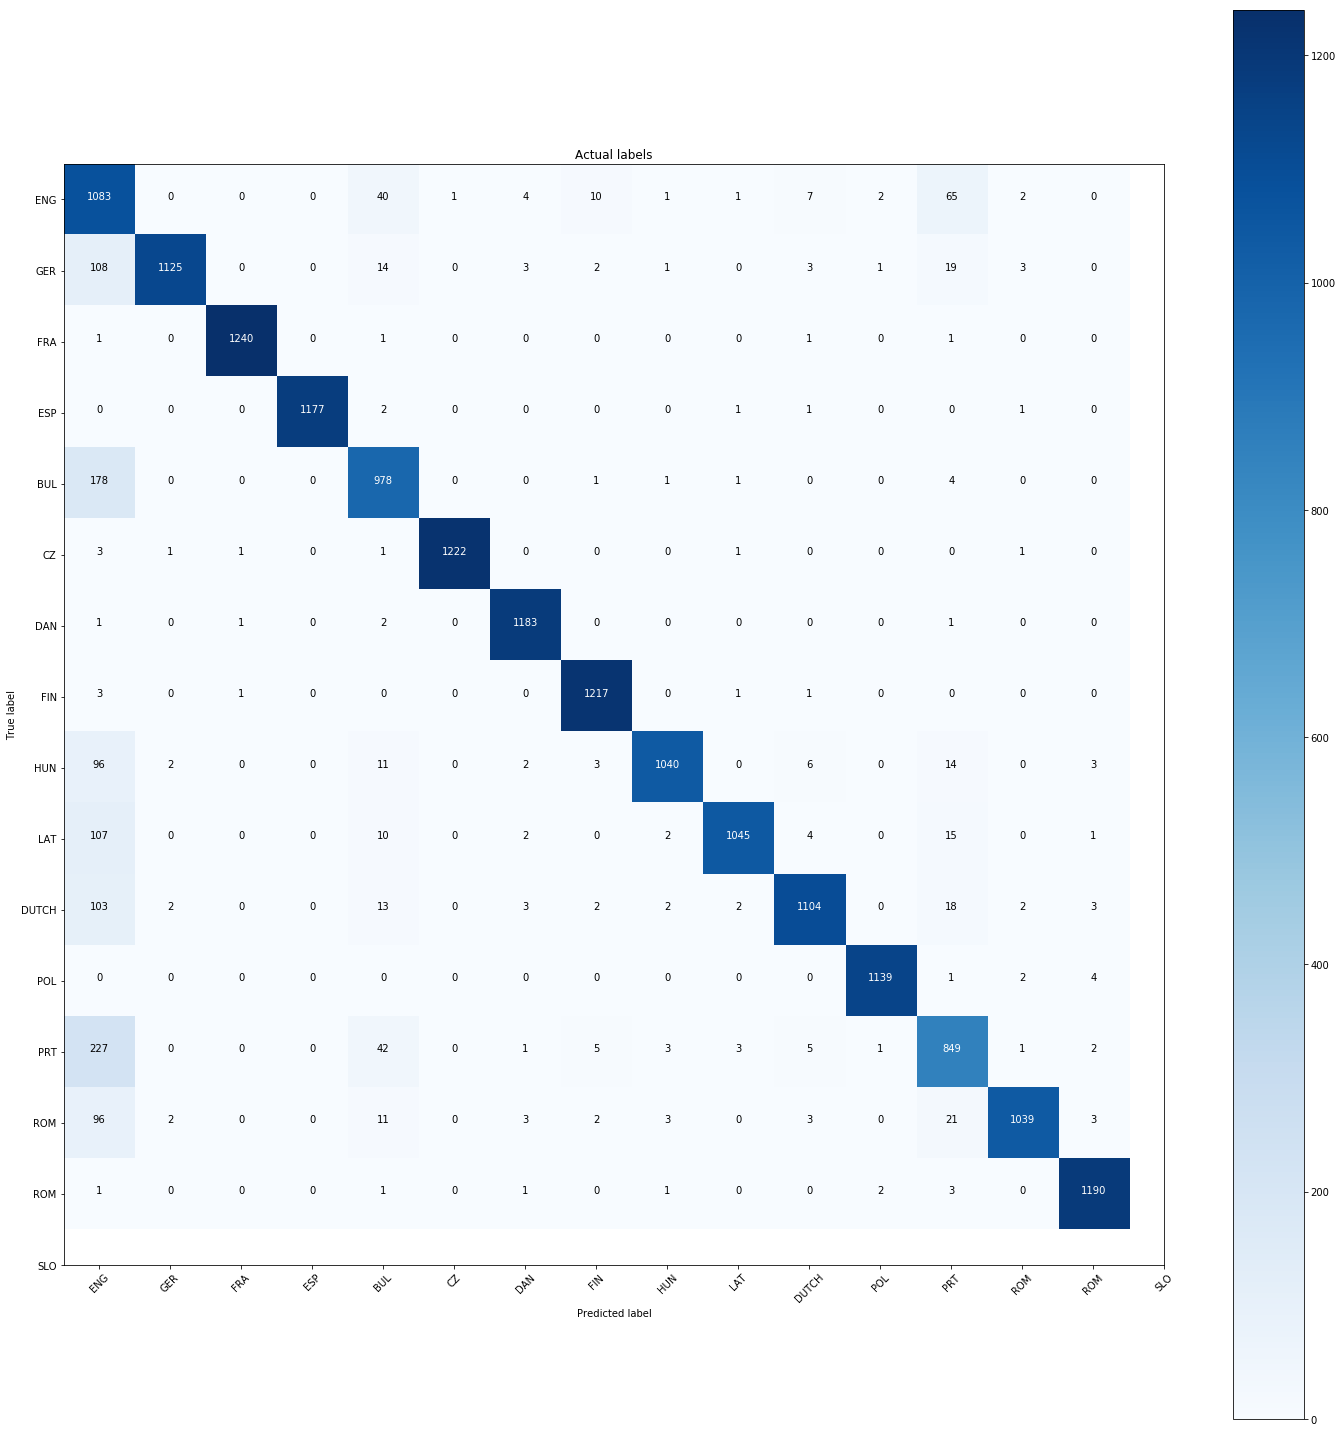

In [58]:
plt.figure(figsize=(20,20))
plot_confusion_matrix(matrix, classes = ['ENG', 'GER', 'FRA', 'ESP','BUL','CZ','DAN','FIN','HUN','LAT','DUTCH','POL','PRT','ROM','ROM','SLO'])

In [59]:
import pickle

In [63]:
lrfile = open('lrmodel.pckl', 'wb')
pickle.dump(pipe_lr, lrfile)
lrfile.close()